# 비지도학습
- 문장 유사도 검사, PCA
- 군집 Clustering : 비슷한 샘플을 모듬
- 이상치 탐지 Outlier Detection : 정상 데이터가 어떻게 보이는지 학습, 비정상 샘플을 감지
- 밀도 추정 : 데이터셋의 확률 밀도 함수(PDF)를 추정. 이상치 탐지 등에 사용

---
# Clustering
### 　K-Means
- 군집화에서 가장 일반적인 알고리즘
- 군집 중심(centriod)이라는 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화
- 일반적인 군집화에서 가장 많이 사용되는 기법
- **거리 기반 알고리즘**으로 속성의 개수가 매우 많을 경우, 군집화의 정확도가 떨어짐





1. 초기 중심점 설정
2. 각 데이터는 가장 가까운 중심점에 소속
3. 중심점을 기준으로 모인 데이터들을 가지고 평균을 구함 -> 새로운 중심점이 됨 (중심점의 이동)
4. 이동된 중심점을 기준으로 다시 가까운 데이터들을 소속 -> 다시 평균값 -> 중심점 재이동
5. 위 과정을 반복했을 때 중심점이 3번 넘게 이동하지 않으면 종료

---
# 실습 - iris 데이터

In [1]:
from sklearn.preprocessing import scale 
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# (1) 데이터 불러오기

In [2]:
iris = load_iris()

#### 데이터 정리

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# (cm) 제거

cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

#### df 로 제작

In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 필요한 특성 두개만 feature로 추출

In [7]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## (2) KMeans()   (군집화)

- n_clusters : 군집화 할 개수, 군집 중심점의 개수
- init : 초기 군집 중심점의 좌표를 설정하는 방식을 결정
- max_iter : 최대 반복 횟수, 모든 데이터의 중심점 이동이 없으면 종료

In [8]:
model = KMeans(n_clusters=3)
model.fit(feature)

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

- iris 꽃 종류는 3개.
- 근데 일반 종류 데이터는 주지않고 군집화를 시켜봤다.

#### 결과 확인

In [9]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- 군집화라서 지도학습의 라벨과 다르다
- 비지도 학습이기 때문에, 중간중간 섞여있는 모습을 보인다.
- 라벨 순서가 원본 데이터의 세토사,버니지카,버시칼라 가 아님!
- 그냥 군집의 숫자

#### 군집 중심값 확인

In [10]:
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

- 각 중심의 ['petal length', 'petal width'] 값

#### 시각화를 위해 다시 정리

In [11]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


- 0이 세토사 아님. 그냥 0번 클러스터

### 시각화

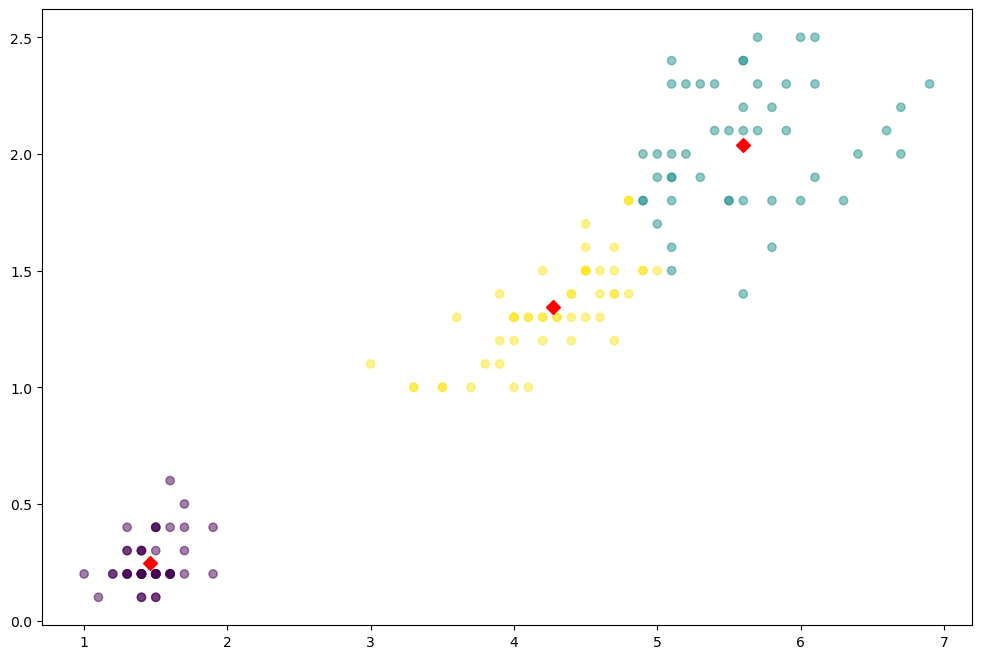

In [13]:
centers = pd.DataFrame(model.cluster_centers_, columns= ['petal length', 'petal width'] )

center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'], c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

---
# make_blobs
- 군집화 공부를 위한 데이터를 만들어주는 모듈

#### 데이터 생성

In [14]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


- X는 특성값 (위에서 'petal length', 'petal width')
- y는 target (위에서 꽃의 종류)

In [15]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


#### 데이터 정리

In [16]:
cluster_df = pd.DataFrame(data=X, columns=['ft1', 'ft2'])
cluster_df['target'] = y
cluster_df.head()

,ft1,ft2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


#### 군집화

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1. KMeans 설정
2. X를 fit_predict -> 결과는 cluster_labels 에 저장
3. cluster_labels 를 cluster_df의 'kmeans_label' 컬럼으로 추가

### 결과 도식화

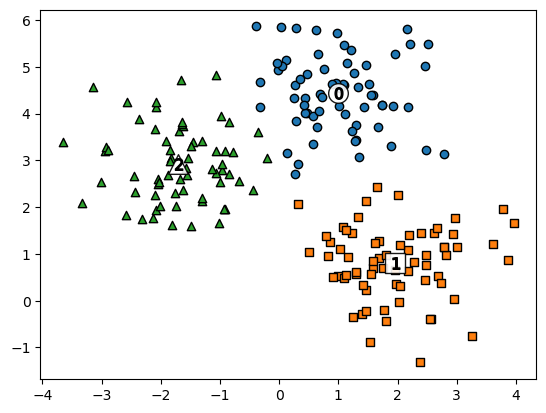

In [19]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ft1'], y=label_cluster['ft2'], edgecolors='k', marker=markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, 
                color='white', alpha=0.9, edgecolors='k', marker=markers[label])  # 중심값 기호
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, 
                color='k', edgecolors='k', marker='$%d$' % label) # 중심값에 있는 글자
    
plt.show()

### 결과 확인

In [20]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


---
# 군집 평가
- 지도학습(회귀, 분류)는 MSE,RMS 또는 precision, recall 등의 참값과 비교하여 평가
- 군집의 경우, 답을 모르는데 어떻게 평가하면 될까? -> 실루엣 분석 사용








## 　실루엣 분석
```
　- 실루엣 분석은 각 군집 간 거리가 얼마나 효율적으로 분리되어 있는지를 나타냄
　- 다른 군집과 거리가 멀고, 동일 군집간은 잘 뭉쳐 있는지 확인
　- 군집화가 잘 되어 있을수록 개별 군집은 비슷한 정도의 여유공간을 갖고 있음
　- 실루엣 계수: 개별 데이터가 갖는 군집화 지표
 ```

### iris 데이터 불러오기

In [23]:
iris = load_iris()
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(data=iris.data, columns=feature_names)

### 군집화

In [22]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 결과 정리

In [25]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### 군집 결과 평가

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_values = silhouette_samples(iris.data, iris_df['cluster'])

print("avg_value : ", avg_value)
print("score_values 의 shape: ", score_values.shape)

avg_value :  0.5528190123564095
score_values 의 shape:  (150,)


### 실루엣 score 시각화

In [29]:
#!pip install yellowbrick

C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


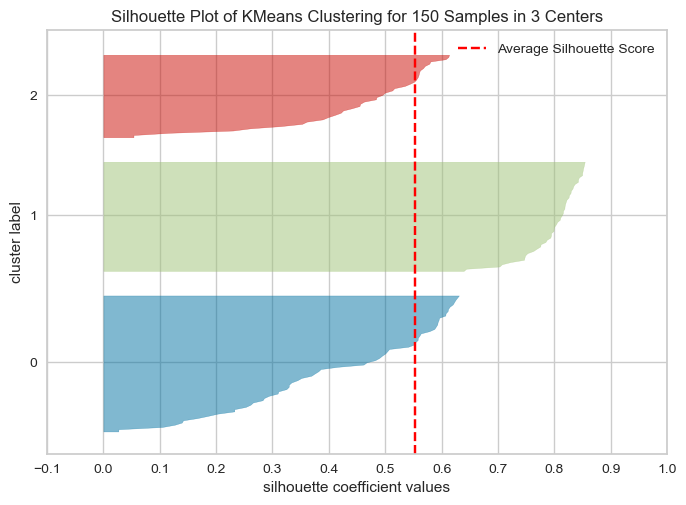

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

In [30]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(kmeans, iris.data, colors='yellowbrick')

- 실루엣 score를 이렇게 그리는 이유 : 데이터의 특성(feature)이 3개 이상인 경우, 일반 시각화로는 알아보기 어렵기 때문
- 각 군집 간 겹치는게 없으면 위 그림처럼 군집 사이에 공간이 있다.
- 군집의 퍼져있는 정도는 위 그래프애서 군집의 세로넓이를 보면 된다.
- 군집이 너무 퍼져있어서 다른 군집이랑 더 가까울수도 있는 데이터가 존재하면, x값이 음의 값을 갖는다.